<a href="https://colab.research.google.com/github/Shrey-Viradiya/HandsOnMachineLearning/blob/master/Ensemble_Learning_and_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ensemble Learning and Random Forests

## Ensemble Learning

Suppose you pose a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. This is called the wisdom of the crowd. Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, load_iris, fetch_openml
from sklearn.metrics import accuracy_score
from seaborn import heatmap

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=259)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=259)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf),('svc',svm_clf)],
    voting = 'hard',
    n_jobs = -1
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='auto',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='lbfgs', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                             

In [3]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.832
RandomForestClassifier 0.92
SVC 0.936
VotingClassifier 0.92


In [4]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), 
    n_estimators=500, 
    max_samples = 100, 
    bootstrap = True,
    n_jobs = -1,
    oob_score=True
)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

In [6]:
print(accuracy_score(y_test, y_pred))

0.912


In [7]:
tree_clf = DecisionTreeClassifier(random_state=259)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.88


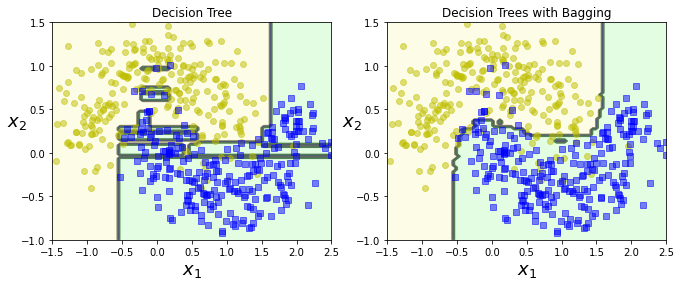

In [8]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree")
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging")

plt.show()

In [9]:
bag_clf.oob_score_

0.92

In [10]:
bag_clf.oob_decision_function_

array([[0.00506329, 0.99493671],
       [0.88571429, 0.11428571],
       [0.01550388, 0.98449612],
       [0.98730964, 0.01269036],
       [1.        , 0.        ],
       [0.0390625 , 0.9609375 ],
       [0.12371134, 0.87628866],
       [0.00520833, 0.99479167],
       [0.97127937, 0.02872063],
       [0.968     , 0.032     ],
       [0.9921466 , 0.0078534 ],
       [0.04485488, 0.95514512],
       [0.0703125 , 0.9296875 ],
       [0.        , 1.        ],
       [0.07238606, 0.92761394],
       [0.00514139, 0.99485861],
       [0.92385787, 0.07614213],
       [0.1       , 0.9       ],
       [0.03092784, 0.96907216],
       [0.98416887, 0.01583113],
       [0.95800525, 0.04199475],
       [0.22074468, 0.77925532],
       [0.96658098, 0.03341902],
       [0.94214876, 0.05785124],
       [0.08488064, 0.91511936],
       [0.04736842, 0.95263158],
       [0.04785894, 0.95214106],
       [0.0026738 , 0.9973262 ],
       [0.96725441, 0.03274559],
       [1.        , 0.        ],
       [0.

## Random Forests

In [11]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [12]:
accuracy_score(y_pred_rf, y_test)

0.92

In [13]:
bag_clf = BaggingClassifier(    DecisionTreeClassifier(max_features="auto", max_leaf_nodes=16),    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features='auto',
                                                        max_leaf_nodes=16,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,


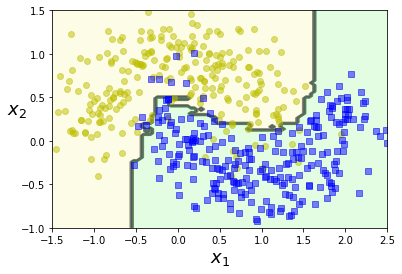

In [14]:
plot_decision_boundary(bag_clf, X, y)

In [15]:
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rnd_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.09571314240068102
sepal width (cm) 0.023864406723597784
petal length (cm) 0.4329192495700588
petal width (cm) 0.4475032013056624


In [16]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.int64)

In [17]:
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

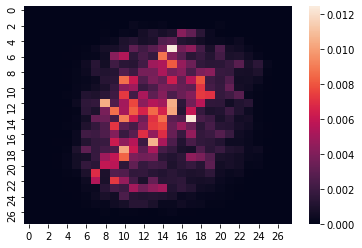

In [18]:
heatmap(rnd_clf.feature_importances_.reshape(28,28))

## Adaboost

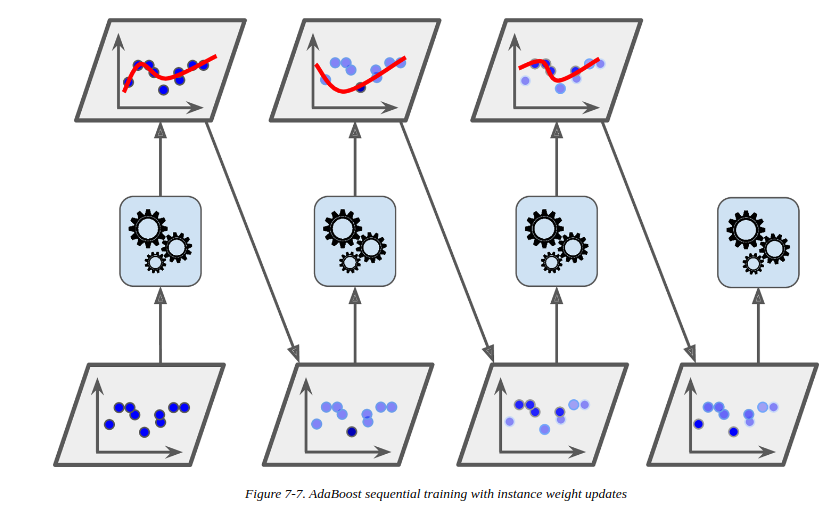

In [19]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=30,
    algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

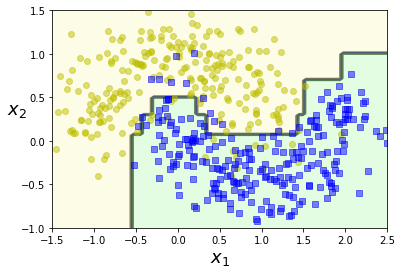

In [20]:
plot_decision_boundary(ada_clf, X, y)

## Gradient Boosting

In [21]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1,1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

In [22]:
np.random.seed(259)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [23]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(max_depth=2)
tree_reg1.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [26]:
X_new = np.array([[0.5]])
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [27]:
y_pred

array([0.71547034])

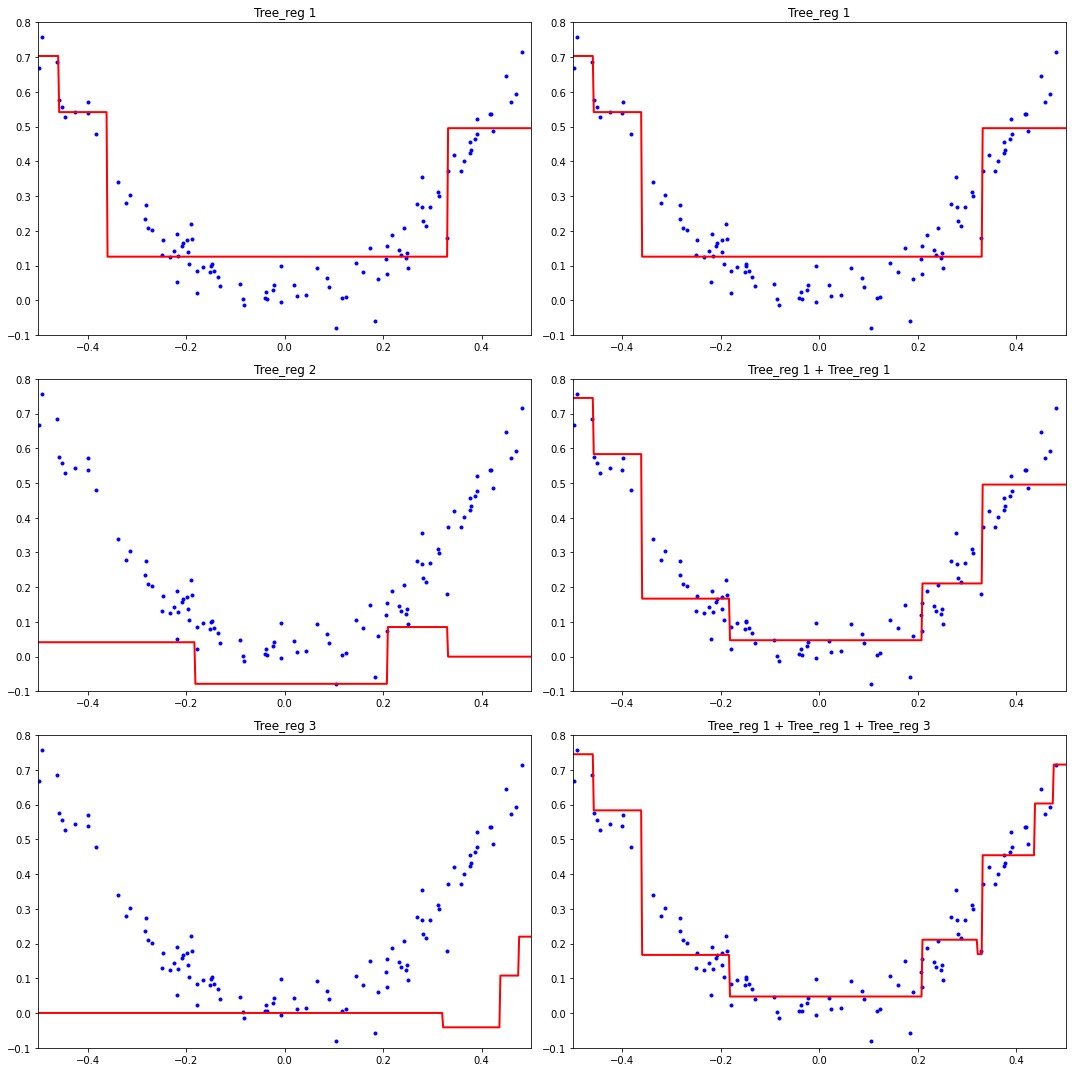

In [28]:
plt.figure(figsize = (15,15))

plt.subplot(321)
plot_predictions([tree_reg1], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 1")
plt.subplot(322)
plot_predictions([tree_reg1], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 1")
plt.subplot(323)
plot_predictions([tree_reg2], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 2")
plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 1 + Tree_reg 1")
plt.subplot(325)
plot_predictions([tree_reg3], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 3")
plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Tree_reg 1 + Tree_reg 1 + Tree_reg 3")

plt.tight_layout()

In [29]:
from sklearn.ensemble import GradientBoostingRegressor

In [30]:
gbrt1 = GradientBoostingRegressor(max_depth = 2, n_estimators=3, learning_rate=1.0)
gbrt1.fit(X,y)

gbrt2 = GradientBoostingRegressor(max_depth = 2, n_estimators=50, learning_rate=0.1)
gbrt2.fit(X,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

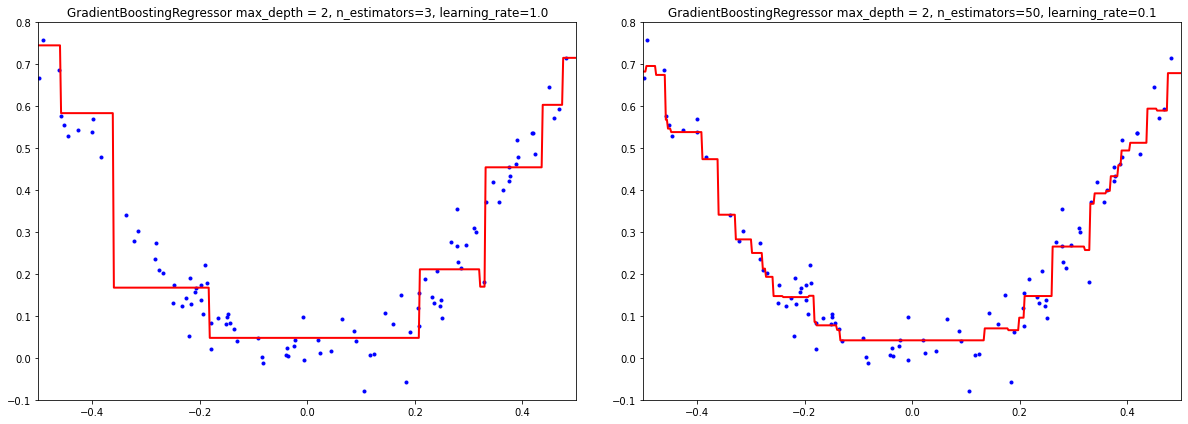

In [31]:
plt.figure(figsize=(17,6))
plt.subplot(121)
plot_predictions([gbrt1], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('GradientBoostingRegressor max_depth = 2, n_estimators=3, learning_rate=1.0')

plt.subplot(122)
plot_predictions([gbrt2], X, y,axes=[-0.5, 0.5, -0.1, 0.8])
plt.title('GradientBoostingRegressor max_depth = 2, n_estimators=50, learning_rate=0.1')

plt.tight_layout()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=33,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

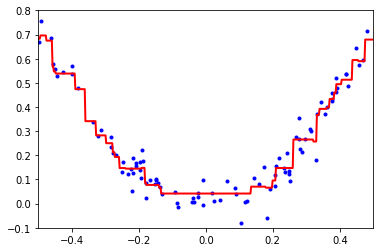

In [33]:
plot_predictions([gbrt2], X, y,axes=[-0.5, 0.5, -0.1, 0.8])

In [34]:
import xgboost

In [35]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)

In [36]:
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

Validation MSE: 0.00505234283532676


In [37]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=2)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[0]	validation_0-rmse:0.23997
Will train until validation_0-rmse hasn't improved in 2 rounds.
[1]	validation_0-rmse:0.17385
[2]	validation_0-rmse:0.12669
[3]	validation_0-rmse:0.09568
[4]	validation_0-rmse:0.07570
[5]	validation_0-rmse:0.06382
[6]	validation_0-rmse:0.05697
[7]	validation_0-rmse:0.05350
[8]	validation_0-rmse:0.05291
[9]	validation_0-rmse:0.05171
[10]	validation_0-rmse:0.05235
[11]	validation_0-rmse:0.05353
Stopping. Best iteration:
[9]	validation_0-rmse:0.05171

Validation MSE: 0.002673851560455351


In [38]:
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=3)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
print("Validation MSE:", val_error)

[0]	validation_0-rmse:0.23997
Will train until validation_0-rmse hasn't improved in 3 rounds.
[1]	validation_0-rmse:0.17385
[2]	validation_0-rmse:0.12669
[3]	validation_0-rmse:0.09568
[4]	validation_0-rmse:0.07570
[5]	validation_0-rmse:0.06382
[6]	validation_0-rmse:0.05697
[7]	validation_0-rmse:0.05350
[8]	validation_0-rmse:0.05291
[9]	validation_0-rmse:0.05171
[10]	validation_0-rmse:0.05235
[11]	validation_0-rmse:0.05353
[12]	validation_0-rmse:0.05365
Stopping. Best iteration:
[9]	validation_0-rmse:0.05171

Validation MSE: 0.002673851560455351


In [39]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train)

15.7 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [40]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

27.6 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
